In [1296]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pickle
import lzma
import scipy

import matplotlib.ticker as ticker
import matplotlib.patches as patches

load_dir = './data/06_14/'
save_dir = "./plots/"
save_fig = 0 #Change to 1 when you want to save figures
fig_ext = '.png'
#fig_ext = '.pdf'

# Analysis at convergence, fixing ($d$, $\rho$, $\lambda$) and varying $\delta$

---

In [360]:
graph="rrg"
d=3
rho="1"
#delta="0.0100"
#lam="0.90"
N=10000

r = r"$\rho$"
l = r"$\lambda$"
dd = r"$\delta$"

In [3]:
data_table = []

file_name = "data_BPEpi_rrg_N10000_d3_deltaMax0.1500_lam0.80_SNAP_seed2_20220614-002940.xz"
with lzma.open(load_dir + file_name, "rb") as f:
    dat0 = pickle.load(f)
data_frame = dat0[0]
data_frame = data_frame.iloc[0:0]

for filename in os.listdir(load_dir):
    path = os.path.join(load_dir, filename)
    if not os.path.isdir(path):
        if not filename.startswith('.'):
            with lzma.open(load_dir + filename, "rb") as f:
                dat = pickle.load(f)
                data_frame = pd.concat([data_frame, dat[0]], ignore_index=True)  

o = r"$\rho$"
s = r"$\delta$"
ov = r"$O_{t=0}$"
mov = r"$MO_{t=0}$"
ov_rnd = r"$O_{t=0,RND}$"
mov_rnd = r"$MO_{t=0,RND}$"
dov = r"$\delta O$"
ovt = r"$\widetilde{O}_{t=0}$"
movt = r"$\widetilde{MO}_{t=0}$"
dovt = r"$\widetilde{\delta O}_{t=0}$"
se_rnd = r"$SE_{RND}$"
mse_rnd = r"$MSE_{RND}$"
dse = r"$\delta SE$"
Rse =  r"$\widetilde{SE}$"
Rmse =  r"$\widetilde{MSE}$"
dRse =  r"$\widetilde{\delta SE}$"
se = "SE"
mse = "MSE"
fI = "$f_I$"

In [1246]:
data_frame[data_frame["# iter"]!=2000]

,$N$,$d$,$\lambda$,n_sim,n_iter,$\delta$,$\rho$,init,$O_{t=0}$,$MO_{t=0}$,...,$\widetilde{MSE}$,$\widetilde{\delta SE}$,logLikelihood,# iter,T,sim,$f_I$,$\rho / \delta$,$\delta / \rho$,$\overline{MSE}$
0,10000,3,1.0,1,2000,0.005,1.0,rnd,1.0000,1.000000,...,1.000000,0.000000e+00,-298.910745,10.0,2,0,0.0466,200.000000,0.005,NaN
1,10000,3,1.0,1,2000,0.005,1.0,inf,1.0000,1.000000,...,1.000000,0.000000e+00,-298.910745,8.0,2,0,0.0466,200.000000,0.005,NaN
2,10000,3,1.0,1,2000,0.010,1.0,rnd,1.0000,0.999999,...,1.000000,3.515663e-07,-523.244334,15.0,5,0,0.5771,100.000000,0.010,-inf
3,10000,3,1.0,1,2000,0.010,1.0,inf,1.0000,0.999999,...,1.000000,3.515663e-07,-523.244334,7.0,5,0,0.5771,100.000000,0.010,-inf
4,10000,3,1.0,1,2000,0.015,1.0,rnd,0.9975,0.997907,...,0.957917,1.423303e-04,-794.383980,561.0,6,0,0.9581,66.666667,0.015,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15915,10000,3,1.0,1,2000,0.130,1.0,inf,0.9554,0.957546,...,0.926876,-2.305262e-03,-3113.146003,72.0,2,0,0.7478,7.692308,0.130,-inf
15916,10000,3,1.0,1,2000,0.140,1.0,rnd,0.9884,0.988330,...,0.992596,-1.192861e-04,-3834.952320,45.0,1,0,0.4503,7.142857,0.140,-inf
15917,10000,3,1.0,1,2000,0.140,1.0,inf,0.9884,0.988330,...,0.992596,-1.192861e-04,-3834.952320,44.0,1,0,0.4503,7.142857,0.140,-inf
15918,10000,3,1.0,1,2000,0.150,1.0,rnd,0.9856,0.986968,...,0.991656,-4.483268e-04,-3945.645097,47.0,1,0,0.4666,6.666667,0.150,-inf


In [5]:
rdd=r"$\rho / \delta$"
ddr=r"$\delta / \rho$"
data_frame[rdd] = data_frame[r]/data_frame[dd]
data_frame[ddr] = data_frame[dd]/data_frame[r]

In [6]:
RmseR = r"$\overline{MSE}$"
data_frame[RmseR] = (data_frame[Rmse] - data_frame[r])/(1- data_frame[r])

In [1202]:
data_frame[(data_frame["# iter"]==2000) & (data_frame[fI]<0.87)]

,$N$,$d$,$\lambda$,n_sim,n_iter,$\delta$,$\rho$,init,$O_{t=0}$,$MO_{t=0}$,...,$\widetilde{MSE}$,$\widetilde{\delta SE}$,logLikelihood,# iter,T,sim,$f_I$,$\rho / \delta$,$\delta / \rho$,$\overline{MSE}$
3160,10000,3,0.7,1,2000,0.005,1.0,rnd,0.9937,0.999779,...,0.811380,-0.235323,-1723.889239,2000.0,9,0,0.8675,200.000000,0.005,-inf
3161,10000,3,0.7,1,2000,0.005,1.0,inf,0.8140,0.805609,...,0.939613,-1.030577,-1335.345090,2000.0,9,0,0.8675,200.000000,0.005,-inf
6564,10000,3,0.7,1,2000,0.015,1.0,rnd,0.9579,0.922608,...,0.882610,-0.537670,-4393.744964,2000.0,7,0,0.8423,66.666667,0.015,-inf
6565,10000,3,0.7,1,2000,0.015,1.0,inf,0.9845,0.991868,...,0.735854,-0.036928,-3340.931965,2000.0,7,0,0.8423,66.666667,0.015,-inf
7482,10000,3,0.7,1,2000,0.010,1.0,rnd,0.9900,0.999521,...,0.792289,-0.172289,-1719.363885,2000.0,8,0,0.8578,100.000000,0.010,-inf
7483,10000,3,0.7,1,2000,0.010,1.0,inf,0.9900,0.999813,...,0.607032,-0.295322,-4446.930296,2000.0,8,0,0.8578,100.000000,0.010,-inf
12522,10000,3,0.7,1,2000,0.010,1.0,rnd,0.9894,0.977456,...,0.817512,-0.105446,4203.572615,2000.0,8,0,0.8651,100.000000,0.010,-inf
12523,10000,3,0.7,1,2000,0.010,1.0,inf,0.9894,0.958173,...,0.849543,-0.331683,5793.790023,2000.0,8,0,0.8651,100.000000,0.010,-inf
12644,10000,3,0.7,1,2000,0.015,1.0,rnd,0.9812,0.958222,...,0.855227,-0.191855,-571.664401,2000.0,7,0,0.8327,66.666667,0.015,-inf
12645,10000,3,0.7,1,2000,0.015,1.0,inf,0.9702,0.951891,...,0.875497,-0.391919,-4177.382837,2000.0,7,0,0.8327,66.666667,0.015,-inf


In [1247]:
df = data_frame[data_frame["# iter"]!=2000]

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_49599/2722410290.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace([np.inf, -np.inf], np.nan, inplace=True)


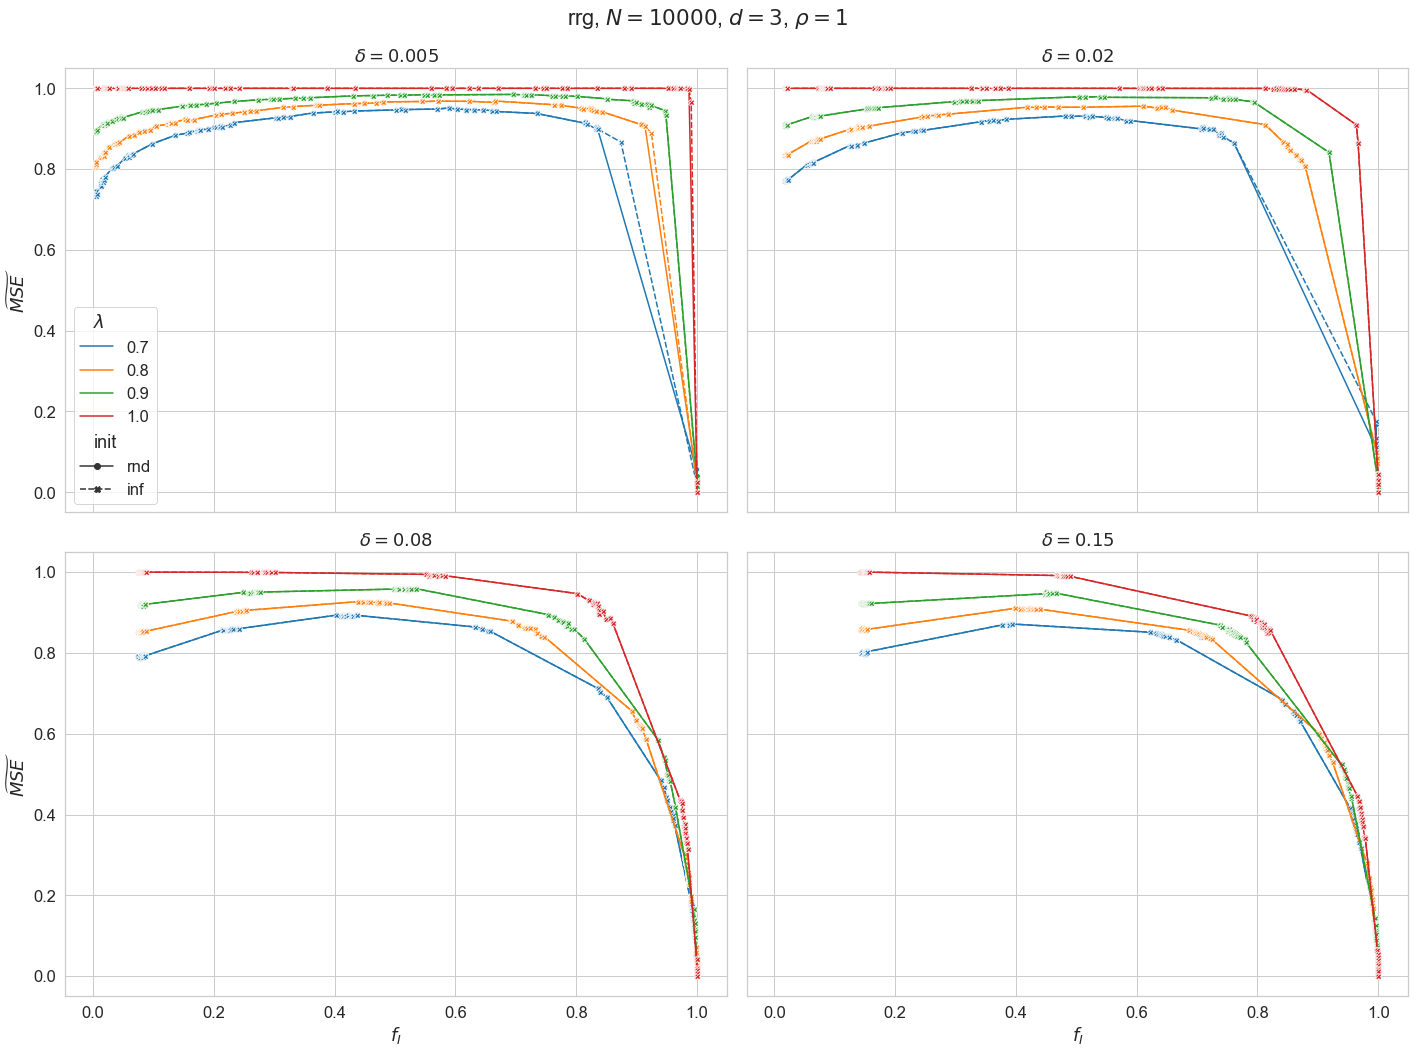

In [1208]:
sns.set_theme(style="whitegrid", font_scale=1.5)
fig,ax = plt.subplots(2,2, figsize=(20,15),sharex=True,sharey=True)
plt.suptitle(f"{graph}, $N=10000$, $d={d}$, $\\rho=1$")
#df = data_frame
df.replace([np.inf, -np.inf], np.nan, inplace=True)
#sns.lineplot(data = df[(df[l]==1.0) & (df[r]!=0.005) & (df[rdd].isin([0.200,0.5,1,2,3,4]))], x = dd, y= movt, markers=True, style="init",ax=ax, hue=rdd, palette="tab10")
sns.lineplot(data = df[(df[l]!=0.17) & (df[dd]==0.005)], x = fI, y= Rmse, markers=True, style="init",ax=ax[0][0], hue=l, palette="tab10")
sns.lineplot(data = df[(df[l]!=0.17) & (df[dd]==0.02)], x = fI, y= Rmse, markers=True, style="init",ax=ax[0][1], hue=l, palette="tab10")
sns.lineplot(data = df[(df[l]!=0.17) & (df[dd]==0.08)], x = fI, y= Rmse, markers=True, style="init",ax=ax[1][0], hue=l, palette="tab10")
sns.lineplot(data = df[(df[l]!=0.17) & (df[dd]==0.15)], x = fI, y= Rmse, markers=True, style="init",ax=ax[1][1], hue=l, palette="tab10")
#sns.stripplot(data = df[df["init"]=="inf"], x = s, y= mse, hue=r,ax=ax, palette="tab10")
ax[0][0].set_title("$\delta=0.005$")
ax[0][1].set_title("$\delta=0.02$")
ax[1][0].set_title("$\delta=0.08$")
ax[1][1].set_title("$\delta=0.15$")
#axs[0].set_ylim([-0.05,1.45])
#ax[0][0].set_xlim([-0.0001,20])
#ax[0][1].set_xlim([-0.0001,20])
#ax.set_xlim([1e-3,1e3])
#ax.set_xscale("log")
ax[0][1].get_legend().remove()
ax[1][0].get_legend().remove()
ax[1][1].get_legend().remove()


plt.tight_layout()
fig.savefig(f"sumRMSE_{graph}_N{N}_d{d}_fI_lam.pdf")

In [1696]:
ini = "rnd"
delt = 0.005

In [1723]:
data_fit = df[(df[l]==0.8) & (df[dd]==delt) & (df["init"]==ini)]

In [1724]:
data_fit = data_fit.groupby(fI).mean()

In [1725]:
yy=Rmse
x = data_fit.index
y = data_fit[yy].values
#if 0 not in data_fit.index:
    #x = np.append(x,0)
    #y = np.append(y,1)
#if 1 not in data_fit.index:
#    x = np.append(x,1)
#    y = np.append(y,0)

#### Fit f

In [479]:
def f(x,a,b,c,d, e):
    return a+ b*x+ c*x*x+ d*x*x*x + e*x*x*x*x

In [451]:
scipy.stats.logistic.cdf(2)

0.8807970779778823

In [438]:
def f2(x,a,b,c,d):
    return a + b*scipy.stats.logistic.cdf(c*x + d)

In [165]:
def f3(x,a,b,c,d):
    return a + b*np.tanh(c*x + d)

In [159]:
param2 = scipy.optimize.curve_fit(f2,x,y,p0=[1,-1,1,1], maxfev=10000)[0]

In [176]:
param3 = scipy.optimize.curve_fit(f3,x,y,p0=[1,-1,1,1], maxfev=10000)[0]

In [177]:
param3

array([  0.45152837,  -0.52673777,  18.35209097, -16.99157046])

In [161]:
param = scipy.optimize.curve_fit(f,x,y,p0=[1,1,1,1,1])[0]

In [162]:
def f_fit(x):
    return f(x,*param)
def f_fit2(x):
    return f2(x,*param2)

In [178]:
def f_fit3(x):
    return f3(x,*param3)

In [179]:
x_plot = np.arange(0,1,0.001)

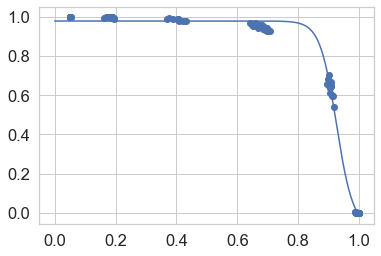

In [180]:
plt.plot(x_plot,f_fit3(x_plot))
plt.scatter(x,y)

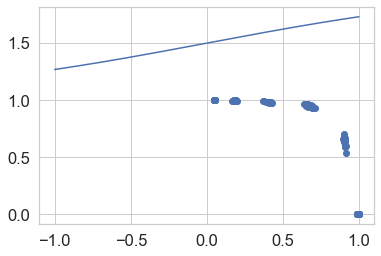

In [149]:
x_plot = np.arange(-1,1,0.001)
plt.plot(x_plot,f2(x_plot,1,1,1))
plt.scatter(x,y)

#### Spline Interpolation


In [1726]:
z = zip(x,y)

In [1727]:
zs = sorted(z)

In [1728]:
x, y = zip(*zs)

In [1729]:
tck = scipy.interpolate.splrep(x,y, s=0.25
)

In [1730]:
x_fit = np.arange(0,1.001,0.005)
#s = scipy.interpolate.UnivariateSpline(x,y,k=5, s=0.004)
#y_fit = s(x_fit)
y_fit = scipy.interpolate.splev(x_fit, tck)
y2 = scipy.interpolate.splev(x, tck)

In [1731]:
sum((y2-y)**2)

0.24999646153272295

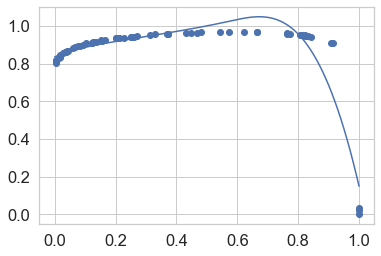

In [1732]:
plt.plot(x_fit,y_fit)
plt.scatter(x,y)
#plt.yscale("log")

### Heatmap

In [26]:
#data_frame[data_frame["# iter"]==2000].iloc[:20,:13]
#df = data_frame[data_frame[dd]!=0.001]

In [1739]:
yy=movt
yy=Rmse
#yy="# iter"

In [1740]:
init_tab = ["rnd","inf"]
init_fix = 0 # {0,1} == {rnd,inf}
l_tab = [0.7,0.8,0.9,1]
dd_tab = np.sort(df[dd].unique())

len_l = len(l_tab)
len_d = len(dd_tab)

In [1741]:
x_fit = np.arange(0.0,1.01,0.02)
len_fI = len(x_fit)
#s_tab=[0.25,0.2,0.025,0.01]
s_tab=[0.02,0.002,0.005,0.05]
y_tabb = np.zeros((len_l,len_d,len_fI))
l_tabb = np.zeros((len_l,len_d,len_fI))
fI_tabb = np.zeros((len_l,len_d,len_fI))
d_tabb = np.zeros((len_l,len_d,len_fI))
for j,lam in enumerate(l_tab):
    for ll,delta in enumerate(dd_tab):
        data_fit = df[(df[l]==lam) & (df[dd]==delta) & (df["init"]==init_tab[init_fix])]
        data_fit = data_fit.groupby(fI).mean()
        x = data_fit.index
        y = data_fit[yy].values
        #if 1 not in data_fit.index:
        #    x = np.append(x,1)
        #    y = np.append(y,0)
        z = zip(x,y)
        zs = sorted(z)
        x, y = zip(*zs)
        tck = scipy.interpolate.splrep(x,y, s=s_tab[j])
        arr = scipy.interpolate.splev(x_fit, tck)
        arr1 = np.minimum(arr,np.full_like(arr,1))
        arr = np.maximum(arr1,np.full_like(arr1,0))
        #y_tabb[j][ll] = np.insert(arr,0,1)
        arr[x_fit<delta] = np.nan
        y_tabb[j][ll] = arr
        l_tabb[j][ll] = np.full_like(y_tabb[j][ll],lam)
        #fI_tabb[j][ll] = np.insert(x_fit,0,0)
        fI_tabb[j][ll] = x_fit
        d_tabb[j][ll] = np.full_like(y_tabb[j][ll],delta)

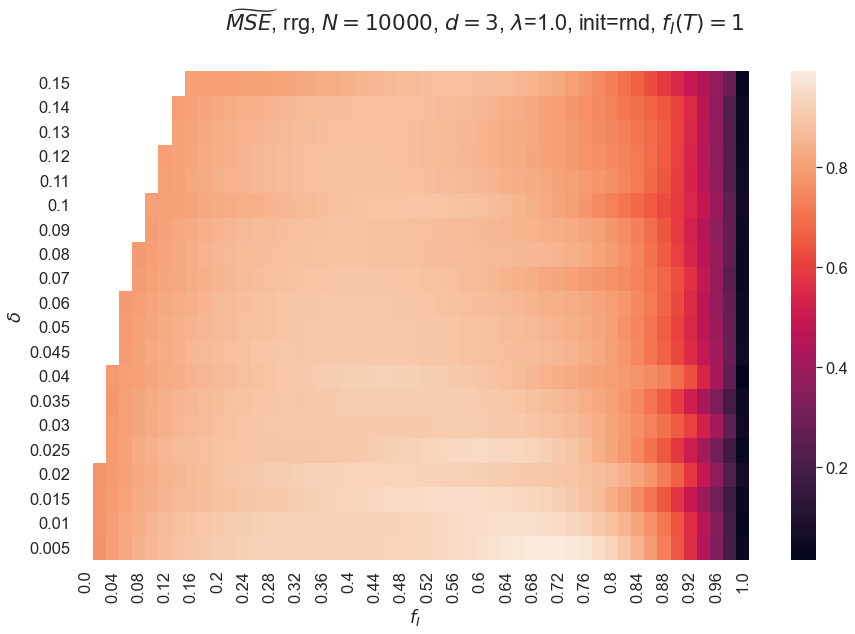

In [1742]:
dff = pd.DataFrame({fI:fI_tabb.flatten(),l:l_tabb.flatten(),dd:d_tabb.flatten(),yy:y_tabb.flatten()})
#dff = dff.dropna()

dff_cut7 = dff[(dff[l]==0.7)].drop(l,axis=1)
dff_cut8 = dff[(dff[l]==0.8)].drop(l,axis=1)
dff_cut9 = dff[(dff[l]==0.9)].drop(l,axis=1)
dff_cut1 = dff[ (dff[l]==1.0)].drop(l,axis=1)
dff_cut = [dff_cut7,dff_cut8,dff_cut9,dff_cut1]
sns.set_theme(style="whitegrid", font_scale=1.5)
fig,ax = plt.subplots(1,1, figsize=(15,9),)
plt.suptitle(yy + f", {graph}, $N={N}$, $d={d}$, " + l + f"={1.0}, init={init_tab[init_fix]}, $f_I(T)=1$")
sns.heatmap(dff_cut7.pivot(dd,fI,yy),ax=ax)
ax.invert_yaxis()
#ax[0].set_title("Random initialization")
#ax[1].invert_yaxis()
#ax[1].set_title("Informed initialization")
#plt.tight_layout()
#fig.savefig(save_dir + f"NC_{graph}_N{N}_d{d}_LAM_RHO_ns5.pdf")

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_49599/4142632796.py:40: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(surf, cax=cbar_ax)


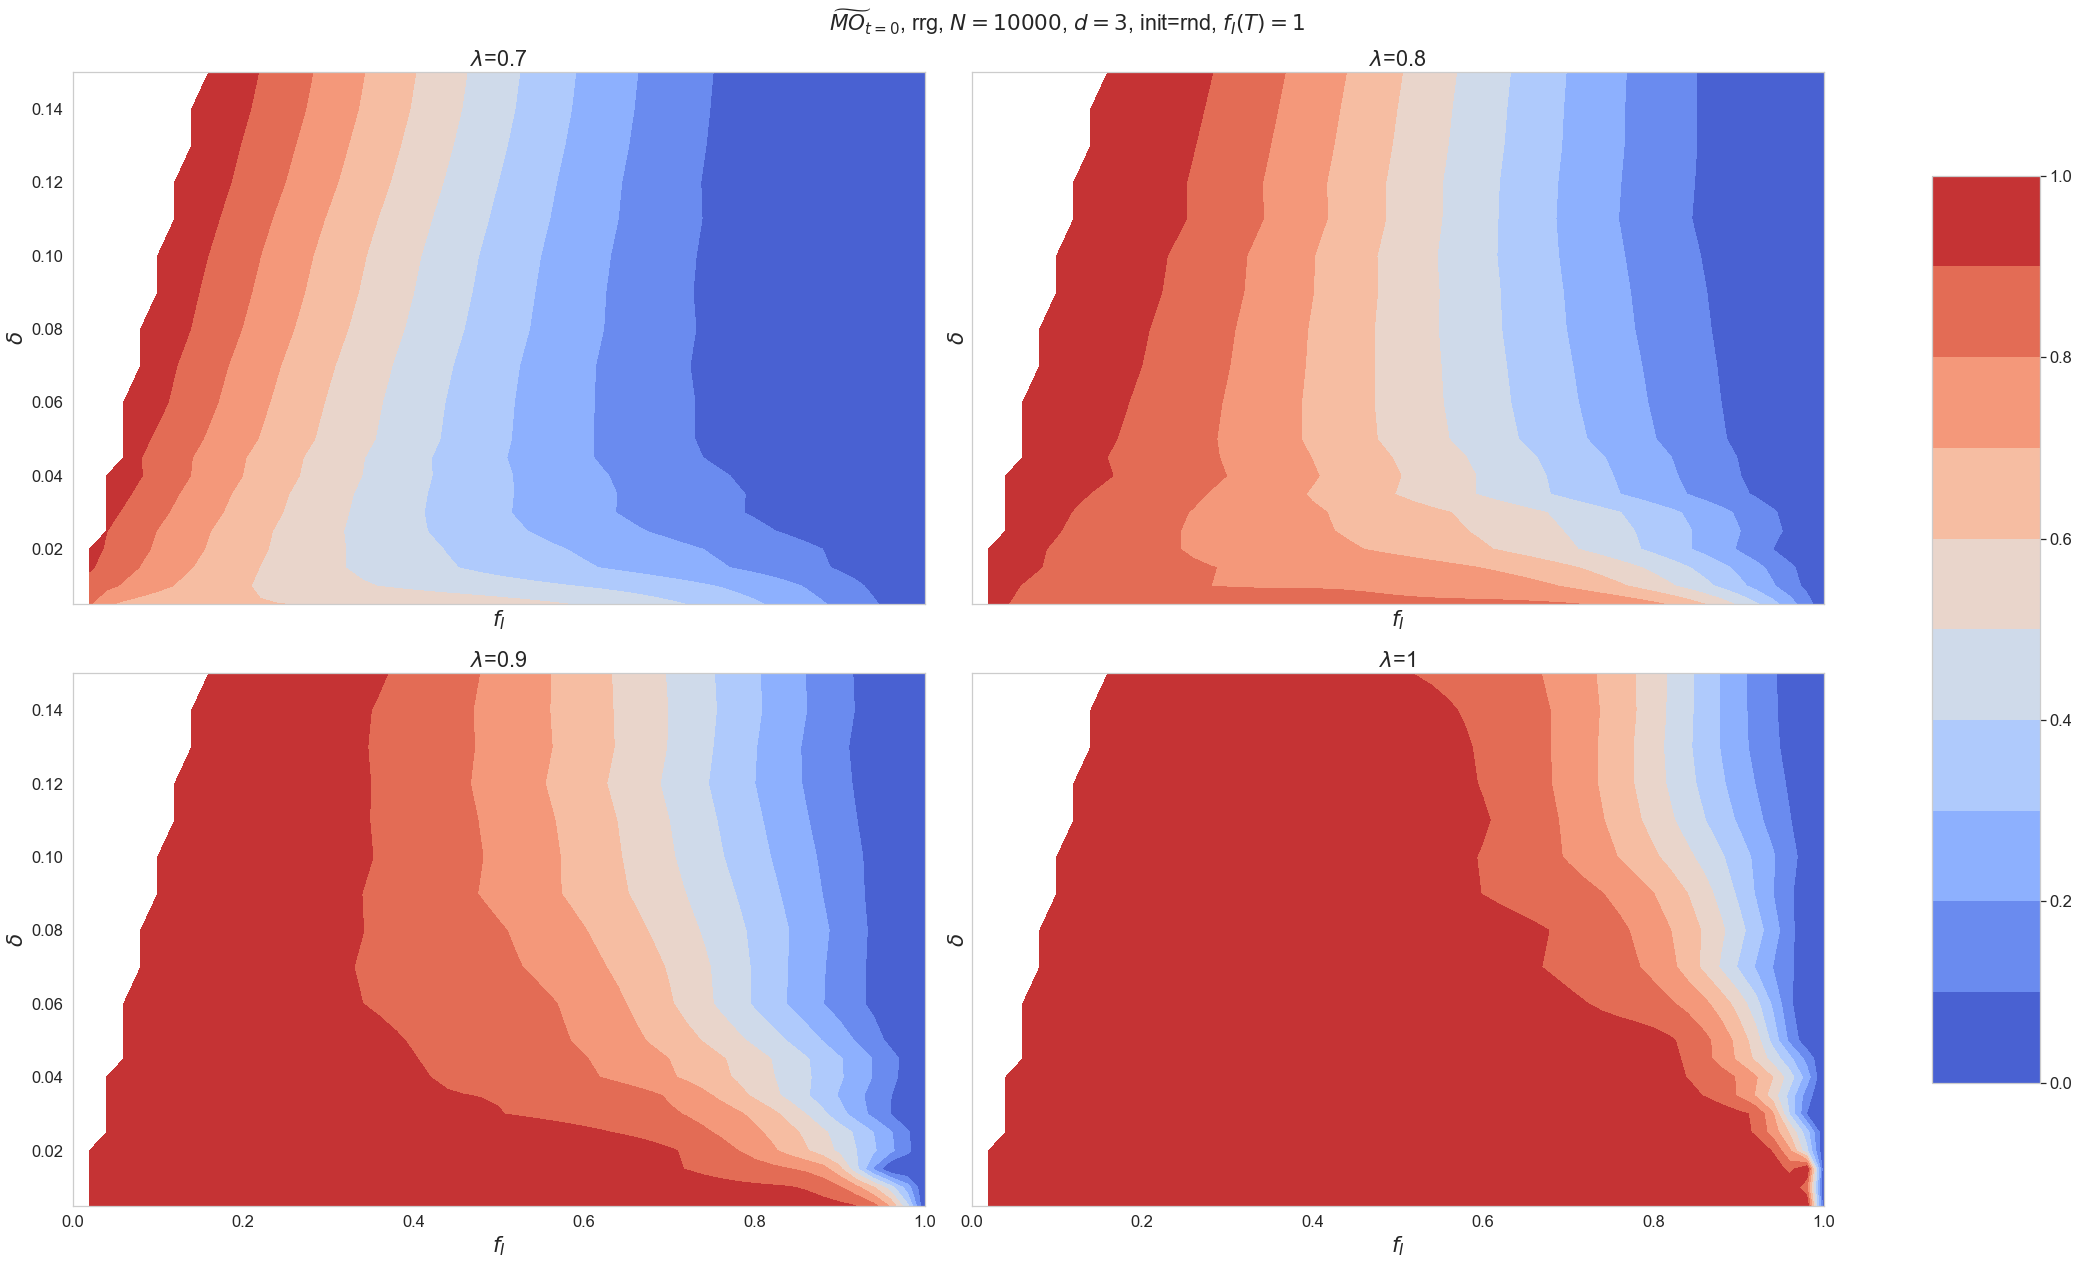

In [1738]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, axs = plt.subplots(2,2, figsize=(30,18), sharex=True, sharey=True)
plt.suptitle(yy + f", {graph}, $N={N}$, $d={d}$,"+ f" init={init_tab[init_fix]}, $f_I(T)=1$", fontsize='large')
levels=10
level_boundaries = np.linspace(0, 1, levels + 1)
for i in range(len(dff_cut)):
    X, Y = np.meshgrid(x_fit, dd_tab)
    Z = dff_cut[i].pivot(dd,fI,yy).values
    axs[int(i/2)][i%2].grid(False)
    # Plot the surface.
    surf = axs[int(i/2)][i%2].contourf(X, Y, Z, cmap=cm.coolwarm, levels=level_boundaries)

    #for ii, xi in enumerate(x_un[i]):
    #    for j, yj in enumerate(y_un[i]):
    #        axs[int(i/2)][i%2].scatter(xi,yj, s=30, color=cm.coolwarm(z_un[i][ii][j]),edgecolors='grey', linewidths=0.2)

    axs[int(i/2)][i%2].set_xlabel(fI, fontsize='large')
    axs[int(i/2)][i%2].set_ylabel(dd,  fontsize='large')
    axs[int(i/2)][i%2].set_title(l + f"={l_tab[i]}",  fontsize='large')
    axs[int(i/2)][i%2].set_xlim([-1e-5,1])
    axs[int(i/2)][i%2].set_ylim([0.005,0.15])
    
    # get data you will need to create a "background patch" to your plot
    xmin, xmax = axs[int(i/2)][i%2].get_xlim()
    ymin, ymax = axs[int(i/2)][i%2].get_ylim()
    xy = (xmin,ymin)
    width = xmax - xmin
    height = ymax - ymin

    # create the patch and place it in the back of countourf (zorder!)
    p = patches.Rectangle(xy, width, height, hatch='/', fill=None, zorder= -10)
    axs[int(i/2)][i%2].add_patch(p)
plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
fig.colorbar(surf, cax=cbar_ax)
#fig.savefig(f"PhaseDiagMOVT_SNAP_{graph}_N{N}_d{d}_RHO_DEL_lam_10.pdf")
#fig.savefig(f"PhaseDiagMOVT_SNAP_{graph}_N{N}_d{d}_fI_DEL_lam_100.pdf")

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_49599/3871422220.py:29: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(surf, cax=cbar_ax)


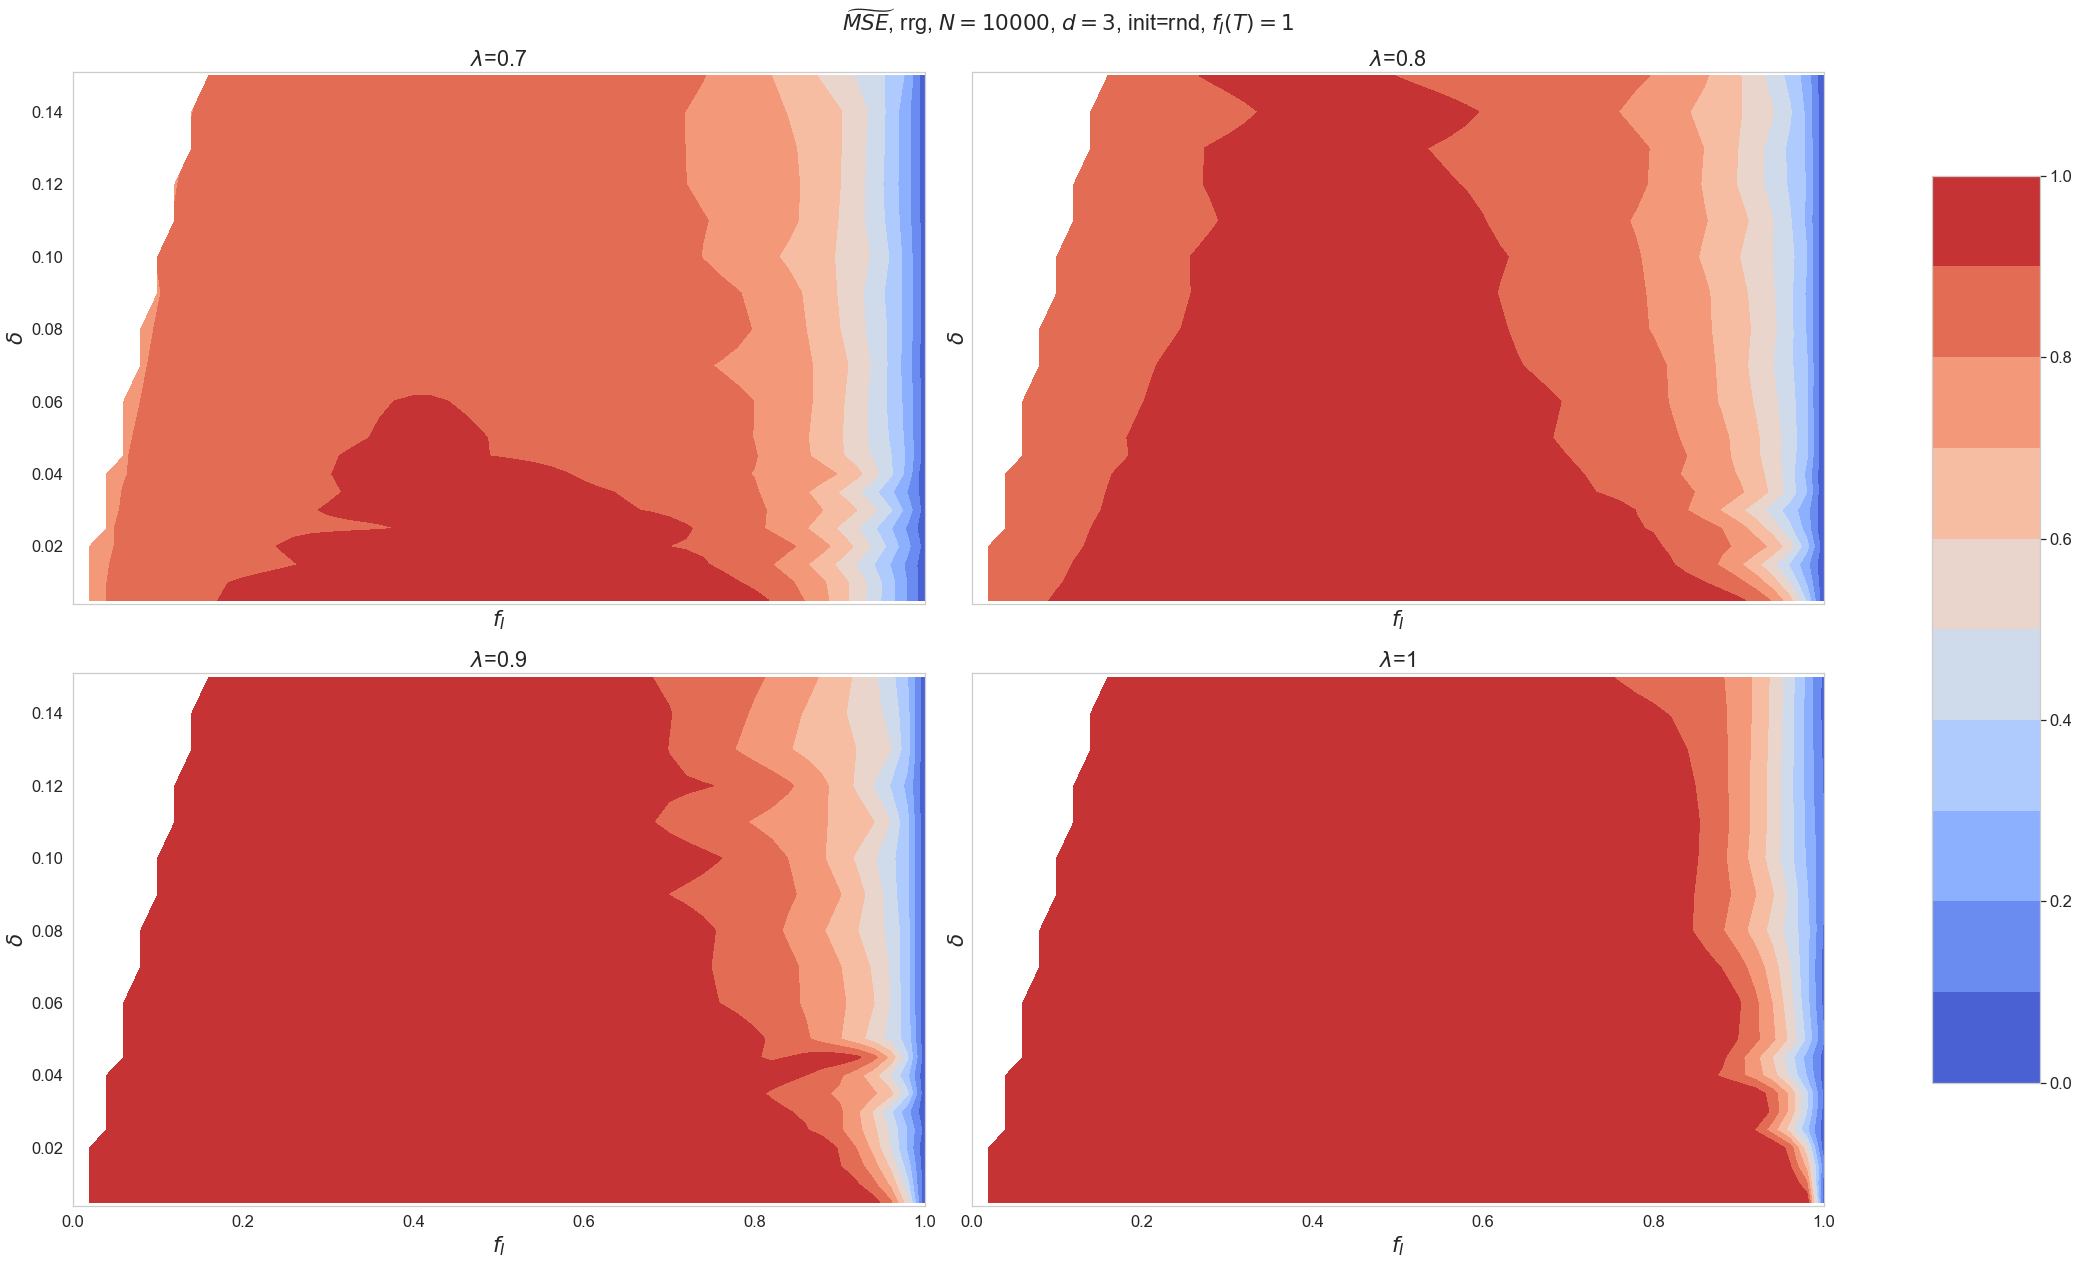

In [1743]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, axs = plt.subplots(2,2, figsize=(30,18), sharex=True, sharey=True)
plt.suptitle(yy + f", {graph}, $N={N}$, $d={d}$,"+ f" init={init_tab[init_fix]}, $f_I(T)=1$", fontsize='large')
levels=10
level_boundaries = np.linspace(0, 1, levels + 1)
for i in range(len(dff_cut)):
    X, Y = np.meshgrid(x_fit, dd_tab)
    Z = dff_cut[i].pivot(dd,fI,yy).values
    axs[int(i/2)][i%2].grid(False)
    # Plot the surface.
    surf = axs[int(i/2)][i%2].contourf(X, Y, Z, cmap=cm.coolwarm, levels=level_boundaries)

    #for ii, xi in enumerate(x_un[i]):
    #    for j, yj in enumerate(y_un[i]):
    #        axs[int(i/2)][i%2].scatter(xi,yj, s=30, color=cm.coolwarm(z_un[i][ii][j]),edgecolors='grey', linewidths=0.2)

    axs[int(i/2)][i%2].set_xlabel(fI, fontsize='large')
    axs[int(i/2)][i%2].set_ylabel(dd,  fontsize='large')
    axs[int(i/2)][i%2].set_title(l + f"={l_tab[i]}",  fontsize='large')
    axs[int(i/2)][i%2].set_xlim([-1e-5,1])
    axs[int(i/2)][i%2].set_ylim([0.004,0.151])
plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
fig.colorbar(surf, cax=cbar_ax)
#fig.savefig(f"PhaseDiagRMSE_SNAP_{graph}_N{N}_d{d}_RHO_DEL_lam_10.pdf")
#fig.savefig(f"PhaseDiagRMSE_SNAP_{graph}_N{N}_d{d}_fI_DEL_lam_100.pdf")